# 台北自行車車禍之分析

作者:李昕融(xinronglee60326@gmail.com)

## 研究動機

根據台北市交通局的施政報告，自102年起都持續將保障行人安全、增加微笑單車Youbike使用率納入施政計畫中，並於103年開始規畫自行車路網，建立自行車、行人之友善環境。因此想根據上述政策，藉由交通事故的數據分析，來觀察施行結果。

In [16]:
#from __future__ import division

#import datetime
import itertools
import json
import requests
# from requests_html import HTMLSession
#import operator


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
#import scipy.stats
#import statsmodels.api as sm

%matplotlib inline


In [17]:
url_6 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=1948cf36-2df1-4e98-95d7-152d30193d3c'
data_6 = pd.read_csv(url_6, encoding='big5')

url_5 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=91fbb8c2-4316-44ac-a101-e7b7ff3ba450'
data_5 = pd.read_csv(url_5, encoding='big5')

url_4 = 'C:/Users/user/Downloads/104a1a2.csv'
data_4 = pd.read_csv(url_4, encoding='utf-8')

url_3 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=5b31590b-1af7-4fed-ac25-6190178acfb5'
data_3 = pd.read_csv(url_3, encoding='big5')

url_2 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=c7fc1411-a8f0-4258-9f66-e16e58dd2cdd'
data_2 = pd.read_csv(url_2, encoding='big5')

url_1 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=dbc05cbf-cced-4793-84e8-fda5f67200da'
data_1 = pd.read_csv(url_1, encoding='big5')


    年份   車禍數量  自行車車禍案件
0  101  45950     1073
1  102  47705     1196
2  103  49135     1283
3  104  49519     1217
4  105  51692     1277
5  106  50951     1189


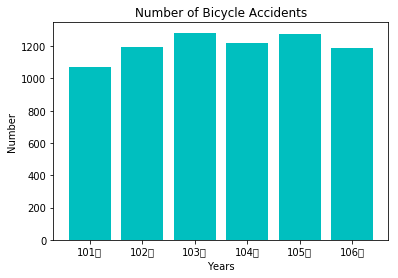

In [26]:
#自行車車禍數量
bike_6 = data_6["車種"] == "F01"
bike_5 = data_5["車種"] == "F01"
bike_4 = data_4["車種"] == "F01"
bike_3 = data_3["車種"] == "F01"
bike_2 = data_2["車種"] == "F01"
bike_1 = data_1["車種"] == "F01"
# print(data_6.loc[bike_6])
# print

list_a = [len(data_1[bike_1]),len(data_2[bike_2]),len(data_3[bike_3]),len(data_4[bike_4]),len(data_5[bike_5]),len(data_6[bike_6])]
list_t = [len(data_1),len(data_2),len(data_3),len(data_4),len(data_5),len(data_6)]
data = ['101','102','103','104','105','106']
dict_t = {"年份":data,'車禍數量':list_t}
dict_a = {"年份":data,"自行車車禍案件":list_a}

df_t = pd.DataFrame(dict_t)
df_a = pd.DataFrame(dict_a)
result = df_t.merge(df_a)

print(result)

#自行車車禍數量

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y1 = list_a
x1 = ['101年','102年','103年','104年','105年','106年']
plt.xlabel("Years")
plt.ylabel("Number")
plt.title('Number of Bicycle Accidents')

plt.bar(x1,y1,color = "c")
plt.show()

Text(0.5,1,'Correlation to Traffic Accident and Bike Accident')

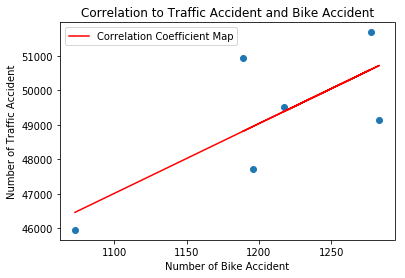

In [33]:
xs = list_a
ys = list_t
# np.corrcoef(list_a,list_t)
plt.scatter(list_a,list_t)

def slope(x_val,y_val):
    x = np.array(x_val)
    y = np.array(y_val)
    m = (((np.mean(x)*np.mean(y))-np.mean(x*y))/((np.mean(x)*np.mean(x))-np.mean(x*x)))
    m = round(m,2)
    b = (np.mean(y)-np.mean(x)*m)
    b = round(b,2)
    return m,b
m,b = slope(xs,ys)

reg_line = [(m*x)+b for x in xs]
plt.xlabel('Number of Bike Accident')
plt.ylabel('Number of Traffic Accident')

plt.plot(xs,reg_line,color = "r",label='Correlation Coefficient Map')
plt.legend(loc='best')
plt.title("Correlation to Traffic Accident and Bike Accident")
# plt.show()

Text(0.5,1,'Correlation to Traffic Accident and Pedestrian')

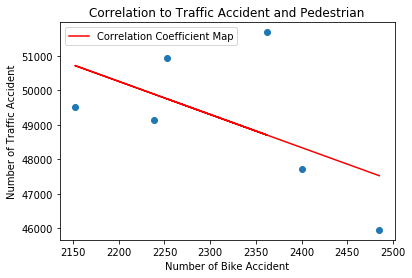

In [32]:
#鄰里交通改善計畫
ped_6 = data_6["車種"] == "H01"
ped_5 = data_5["車種"] == "H01"
ped_4 = data_4["車種"] == "H01"
ped_3 = data_3["車種"] == "H01"
ped_2 = data_2["車種"] == "H01"
ped_1 = data_1["車種"] == "H01"

list_ped = [len(data_1[ped_1]),len(data_2[ped_2]),len(data_3[ped_3]),len(data_4[ped_4]),len(data_5[ped_5]),len(data_6[ped_6])]
df_ped = pd.DataFrame(list_c)

x2 = list_ped
y2 = list_t
# np.corrcoef(list_a,list_t)
plt.scatter(list_ped,list_t)

def slope(x_val,y_val):
    x = np.array(x_val)
    y = np.array(y_val)
    m = (((np.mean(x)*np.mean(y))-np.mean(x*y))/((np.mean(x)*np.mean(x))-np.mean(x*x)))
    m = round(m,2)
    b = (np.mean(y)-np.mean(x)*m)
    b = round(b,2)
    return m,b
m,b = slope(x2,y2)

reg_line = [(m*x)+b for x in x2]
plt.xlabel('Number of Bike Accident')
plt.ylabel('Number of Traffic Accident')

plt.plot(x2,reg_line,color = "r",label='Correlation Coefficient Map')
plt.legend(loc='best')
plt.title("Correlation to Traffic Accident and Pedestrian")
# plt.show()

In [14]:
#事故位置
num_6 = data_6.groupby("車種").size()
num_5 = data_5.groupby("車種").size()
num_4 = data_4.groupby("車種").size()
num_3 = data_3.groupby("車種").size()
num_2 = data_2.groupby("車種").size()
num_1 = data_1.groupby("車種").size()

list_c = [num_6,num_5,num_3,num_2,num_1]
df_location = pd.DataFrame(list_c)
# print(df_location)

df_location[['F01',"H01"]]

,F01,H01
0,1189.0,2253.0
1,1277.0,2362.0
2,1283.0,2238.0
3,1196.0,2400.0
4,1073.0,2485.0


In [23]:
# print(data_6.loc[bike_6])

另外，臺北市於104年4月1日實行借用Youbike前三十分鐘須付費的政策，並於105開始規劃自行車路網，透過分析Youbike租借次數來觀察政策的影響性。 

In [18]:
url = 'C:/Users/user/Desktop/ubike_num.csv'
num = pd.read_csv(url, encoding = 'big5')
# location = num.groupby('租借次數(車次)').size()
num.dropna()
# a = num.get("租借次數(車次)")
# print(a)
# print(num)
n = num.iloc[0:9,1]
m = num.iloc[0:9,0]
total = num.iloc[:]

series_n =  pd.Series(n)
series_m = pd.Series(m)

print(total)


        月份    租借次數(車次)
0   103年3月     1767106
1   103年4月     1938518
2   104年3月     2065266
3   104年4月     1662426
4   105年3月     1242340
5   105年4月     1582565
6   106年3月     1719024
7   106年4月     1900724
8   107年3月     2191938
9   107年4月     2221447


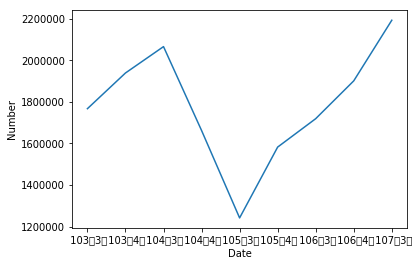

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
y1 = series_n
x1 = series_m
plt.xlabel("Date")
plt.ylabel("Number")

plt.plot(x1,y1)
plt.show()
